# 从mysql获取之前抓取的数据，并存为csv

In [100]:
import pymysql
import csv
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import jieba 
from wordcloud import WordCloud 
import matplotlib as mpl 
import seaborn as sns
import pyecharts
import PIL.Image as image
import matplotlib.ticker as mtick  
from pyecharts.charts import Bar
from pyecharts import options as opts
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
def from_mysql_get_all_info():
    conn = pymysql.connect(
        host='127.0.0.1',
        port=3306,
        user='root',
        db= 'shixiseng',
        password='输入你的密码',
        charset='utf8mb4')

    cursor = conn.cursor()
    sql = 'select * from info'
    cursor.execute(sql.encode('utf-8'))
    data = cursor.fetchall()
    conn.close()
    return data


def write_csv():
    data = from_mysql_get_all_info()
    filename = 'shixiseng.csv'
    with open(filename,mode='w',encoding='utf-8') as f:
        write = csv.writer(f,dialect='excel')
        for item in data:
            write.writerow(item)

write_csv()

# 读取数据

In [3]:
data = pd.read_csv('shixiseng.csv') 
data.columns = ['工作','工资','城市','每周工作时长','实习期','公司名','公司规模','优点']

In [4]:
data.head()

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5天/周,6个月,店匠科技,50-150人,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
1,数据分析师,100-150/天,兰州,5天/周,12个月,亚信科技,2000人以上,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会
2,数据分析师岗（实习生）,120-150/天,北京,5天/周,3个月,京东,2000人以上,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...
3,数据分析实习生,150-300/天,北京,5天/周,6个月,蓝港互动集团,500-2000人,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5天/周,6个月,掌维科技,50-150人,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...


In [5]:
data = pd.DataFrame(data)
data

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5天/周,6个月,店匠科技,50-150人,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
1,数据分析师,100-150/天,兰州,5天/周,12个月,亚信科技,2000人以上,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会
2,数据分析师岗（实习生）,120-150/天,北京,5天/周,3个月,京东,2000人以上,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...
3,数据分析实习生,150-300/天,北京,5天/周,6个月,蓝港互动集团,500-2000人,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5天/周,6个月,掌维科技,50-150人,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...
5,数据分析,100-150/天,上海,3天/周,7个月,蓝石广告,15-50人,氛围自由能学到真材实料快速成长 优秀可转正，资深团队，自由氛围，发展潜力巨大，无限挑战
6,项目管培生,300-500/天,广州,6天/周,12个月,尚德机构,2000人以上,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...
7,海尔运营助理实习生,100-150/天,广州,3天/周,3个月,海尔HotOEM,15-50人,周末双休数据分析能力跨境电商行业
8,Data analyst-数据分析师,200-300/天,上海,5天/周,1个月,朝睿咨询,150-500人,留学生实习远程实习可转正实习
9,市场调研实习生,120-200/天,广州,5天/周,4个月,道乐科技,50-150人,互联网金融市场调研数据分析渠道分析优秀团队 移动互联网，互联网金融，团队有活力，薪酬福利好，...


In [6]:
# 看数据的规模 以及是否有缺失项
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
工作        411 non-null object
工资        411 non-null object
城市        411 non-null object
每周工作时长    411 non-null object
实习期       411 non-null object
公司名       411 non-null object
公司规模      411 non-null object
优点        411 non-null object
dtypes: object(8)
memory usage: 25.8+ KB


# 部分数据反了

In [7]:
# 找到每周工作时长与实习期填反的数据 对其单独进行交换操作
error = data[data["每周工作时长"].str.contains("月")]
error

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
43,Spss数据分析师,400-500/天,上海,12个月,5天/周,准雀Accunique,150-500人,薪资丰厚 数据分析服务，数学建模辅导，有竞争力薪资，广阔的学习空间
44,数据分析实习生,120-150/天,深圳,3个月,5天/周,盛业资本,150-500人,可转正实习地铁周边生日福利朝九晚五周末双休下午茶 这里有梦想，行业领导者，团队有活力，薪资福...
45,数据分析师,100-150/天,西安,12个月,4天/周,亚信科技,2000人以上,一对一面授提供转正机会 优秀的团队，技术，留用转正机会
46,数据分析实习生,100-120/天,上海,6个月,5天/周,广汇汽车,2000人以上,交通补贴免费午餐 保障，有钱任性
47,运营助理,250-300/天,杭州,12个月,5天/周,品誉电商,15-50人,责任心强数据分析标题优化 潜力大，发展潜力巨大，团队氛围好，适合大学生，薪酬福利优厚，注重潜能
48,数据分析实习生,80-150/天,重庆,7个月,4天/周,道微投资,15-50人,专人带领可转正实习周末双休 专人带领，公司福利好，工作零食，百闻不如一见，机构大神多，实习薪...
49,数据分析实习生,120-150/天,北京,5个月,4天/周,易点租,500-2000人,数据统计数据分析 交通方便，午餐补助，亿级用户，成长空间好，团队给力，法定节假日，福利多多
50,数据分析实习生,150-200/天,北京,7个月,5天/周,CityDNA,15-50人,导师学习
51,游戏运营（数据分析),100-150/天,北京,6个月,5天/周,绿洲游戏,150-500人,可转正实习 五险一金，伙伴好，多元文化，补充医疗保险，炫酷下午茶，扁平管理，老板80后，弹性...
52,数据分析-知识图谱方向,120-180/天,北京,3个月,5天/周,用友集团,500-2000人,远程实习可转正实习留学生实习可转正 成长机会多，企业互联网化，有竞争力薪资，节假日生日福利，...


In [8]:
# 从源数据中剔除异常数据 修改后在加进去
data_1 = data.drop(error.index)

In [9]:
data_1[data_1["每周工作时长"].str.contains("月")]

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点


In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 410
Data columns (total 8 columns):
工作        354 non-null object
工资        354 non-null object
城市        354 non-null object
每周工作时长    354 non-null object
实习期       354 non-null object
公司名       354 non-null object
公司规模      354 non-null object
优点        354 non-null object
dtypes: object(8)
memory usage: 24.9+ KB


In [11]:
# 对异常数据进行操作 交换
error[['每周工作时长','实习期']] = error[['实习期','每周工作时长']]

/Users/guo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
error

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
43,Spss数据分析师,400-500/天,上海,5天/周,12个月,准雀Accunique,150-500人,薪资丰厚 数据分析服务，数学建模辅导，有竞争力薪资，广阔的学习空间
44,数据分析实习生,120-150/天,深圳,5天/周,3个月,盛业资本,150-500人,可转正实习地铁周边生日福利朝九晚五周末双休下午茶 这里有梦想，行业领导者，团队有活力，薪资福...
45,数据分析师,100-150/天,西安,4天/周,12个月,亚信科技,2000人以上,一对一面授提供转正机会 优秀的团队，技术，留用转正机会
46,数据分析实习生,100-120/天,上海,5天/周,6个月,广汇汽车,2000人以上,交通补贴免费午餐 保障，有钱任性
47,运营助理,250-300/天,杭州,5天/周,12个月,品誉电商,15-50人,责任心强数据分析标题优化 潜力大，发展潜力巨大，团队氛围好，适合大学生，薪酬福利优厚，注重潜能
48,数据分析实习生,80-150/天,重庆,4天/周,7个月,道微投资,15-50人,专人带领可转正实习周末双休 专人带领，公司福利好，工作零食，百闻不如一见，机构大神多，实习薪...
49,数据分析实习生,120-150/天,北京,4天/周,5个月,易点租,500-2000人,数据统计数据分析 交通方便，午餐补助，亿级用户，成长空间好，团队给力，法定节假日，福利多多
50,数据分析实习生,150-200/天,北京,5天/周,7个月,CityDNA,15-50人,导师学习
51,游戏运营（数据分析),100-150/天,北京,5天/周,6个月,绿洲游戏,150-500人,可转正实习 五险一金，伙伴好，多元文化，补充医疗保险，炫酷下午茶，扁平管理，老板80后，弹性...
52,数据分析-知识图谱方向,120-180/天,北京,5天/周,3个月,用友集团,500-2000人,远程实习可转正实习留学生实习可转正 成长机会多，企业互联网化，有竞争力薪资，节假日生日福利，...


In [13]:
data_change_column = pd.concat([data_1,error])

In [14]:
# 看一下还有没有反的数据
data_change_column[data_change_column["每周工作时长"].str.contains("月")]

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点


In [15]:
data_change_column.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 235
Data columns (total 8 columns):
工作        411 non-null object
工资        411 non-null object
城市        411 non-null object
每周工作时长    411 non-null object
实习期       411 non-null object
公司名       411 non-null object
公司规模      411 non-null object
优点        411 non-null object
dtypes: object(8)
memory usage: 28.9+ KB


In [16]:
data_change_column.head()

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5天/周,6个月,店匠科技,50-150人,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
1,数据分析师,100-150/天,兰州,5天/周,12个月,亚信科技,2000人以上,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会
2,数据分析师岗（实习生）,120-150/天,北京,5天/周,3个月,京东,2000人以上,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...
3,数据分析实习生,150-300/天,北京,5天/周,6个月,蓝港互动集团,500-2000人,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5天/周,6个月,掌维科技,50-150人,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...


# 数值型数据处理

## 处理每周工作时长

In [17]:
# 先以“/”分割字符串
data_daysperweek = data_change_column['每周工作时长'].str.split('/', expand = True)
data_daysperweek.sample(5)

,0,1
35,5天,周
194,5天,周
114,5天,周
198,5天,周
32,4天,周


In [18]:
# 接着把数字提取出来， 转换为float型
data_daysperweek['num'] = data_change_column['每周工作时长'].str.extract('([0-9.]+)', expand=False).astype('float')
data_daysperweek.sample(5)

,0,1,num
53,2天,周,2.0
273,5天,周,5.0
324,5天,周,5.0
339,3天,周,3.0
297,5天,周,5.0


In [19]:
# 把提取出的数字替换原来的数据
data_change_column['每周工作时长'] = data_daysperweek['num']
data_change_column.head()

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5.0,6个月,店匠科技,50-150人,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
1,数据分析师,100-150/天,兰州,5.0,12个月,亚信科技,2000人以上,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会
2,数据分析师岗（实习生）,120-150/天,北京,5.0,3个月,京东,2000人以上,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...
3,数据分析实习生,150-300/天,北京,5.0,6个月,蓝港互动集团,500-2000人,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5.0,6个月,掌维科技,50-150人,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...


## 处理实习期

In [20]:
data_duration = data_change_column['实习期'].str.extract('([0-9.]+)', expand=False).astype('float')
data_duration.sample(5)

201     9.0
266     1.0
310    12.0
377     3.0
393     3.0
Name: 实习期, dtype: float64

In [21]:
data_change_column['实习期'] = data_duration
data_change_column

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5.0,6.0,店匠科技,50-150人,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
1,数据分析师,100-150/天,兰州,5.0,12.0,亚信科技,2000人以上,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会
2,数据分析师岗（实习生）,120-150/天,北京,5.0,3.0,京东,2000人以上,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...
3,数据分析实习生,150-300/天,北京,5.0,6.0,蓝港互动集团,500-2000人,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5.0,6.0,掌维科技,50-150人,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...
5,数据分析,100-150/天,上海,3.0,7.0,蓝石广告,15-50人,氛围自由能学到真材实料快速成长 优秀可转正，资深团队，自由氛围，发展潜力巨大，无限挑战
6,项目管培生,300-500/天,广州,6.0,12.0,尚德机构,2000人以上,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...
7,海尔运营助理实习生,100-150/天,广州,3.0,3.0,海尔HotOEM,15-50人,周末双休数据分析能力跨境电商行业
8,Data analyst-数据分析师,200-300/天,上海,5.0,1.0,朝睿咨询,150-500人,留学生实习远程实习可转正实习
9,市场调研实习生,120-200/天,广州,5.0,4.0,道乐科技,50-150人,互联网金融市场调研数据分析渠道分析优秀团队 移动互联网，互联网金融，团队有活力，薪酬福利好，...


## 处理公司规模

通过观察可以看到 公司规模有4种表述 -  xxx-xxx人   少于15人    2000人以上    分开处理

In [22]:
data_scalenotnull = data_change_column[data_change_column['公司规模'] !='-']
data_scalenotnull

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5.0,6.0,店匠科技,50-150人,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
1,数据分析师,100-150/天,兰州,5.0,12.0,亚信科技,2000人以上,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会
2,数据分析师岗（实习生）,120-150/天,北京,5.0,3.0,京东,2000人以上,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...
3,数据分析实习生,150-300/天,北京,5.0,6.0,蓝港互动集团,500-2000人,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5.0,6.0,掌维科技,50-150人,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...
5,数据分析,100-150/天,上海,3.0,7.0,蓝石广告,15-50人,氛围自由能学到真材实料快速成长 优秀可转正，资深团队，自由氛围，发展潜力巨大，无限挑战
6,项目管培生,300-500/天,广州,6.0,12.0,尚德机构,2000人以上,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...
7,海尔运营助理实习生,100-150/天,广州,3.0,3.0,海尔HotOEM,15-50人,周末双休数据分析能力跨境电商行业
8,Data analyst-数据分析师,200-300/天,上海,5.0,1.0,朝睿咨询,150-500人,留学生实习远程实习可转正实习
9,市场调研实习生,120-200/天,广州,5.0,4.0,道乐科技,50-150人,互联网金融市场调研数据分析渠道分析优秀团队 移动互联网，互联网金融，团队有活力，薪酬福利好，...


In [23]:
a = data_scalenotnull[data_scalenotnull['公司规模']== "2000人以上"]
b = data_scalenotnull[data_scalenotnull['公司规模']== "少于15人"]
c = data_scalenotnull.drop(a.index)
c = c.drop(b.index)
c

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5.0,6.0,店匠科技,50-150人,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
3,数据分析实习生,150-300/天,北京,5.0,6.0,蓝港互动集团,500-2000人,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5.0,6.0,掌维科技,50-150人,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...
5,数据分析,100-150/天,上海,3.0,7.0,蓝石广告,15-50人,氛围自由能学到真材实料快速成长 优秀可转正，资深团队，自由氛围，发展潜力巨大，无限挑战
7,海尔运营助理实习生,100-150/天,广州,3.0,3.0,海尔HotOEM,15-50人,周末双休数据分析能力跨境电商行业
8,Data analyst-数据分析师,200-300/天,上海,5.0,1.0,朝睿咨询,150-500人,留学生实习远程实习可转正实习
9,市场调研实习生,120-200/天,广州,5.0,4.0,道乐科技,50-150人,互联网金融市场调研数据分析渠道分析优秀团队 移动互联网，互联网金融，团队有活力，薪酬福利好，...
10,数据分析实习生,150-200/天,佛山,5.0,4.0,出众集团,150-500人,包吃住培训 领导好，客户资源丰富
11,数据分析师,250-300/天,北京,6.0,6.0,红海无限,50-150人,可转正实习一对一导师五险一金提供食宿 环境氛围好，休闲类游戏，导师制，包住宿两餐
12,数据分析实习生,120-150/天,北京,5.0,4.0,独到科技,50-150人,技术大牛 晋升机会多，帅哥美女福利，员工素质高，团队领导非常nice，五险&amp; 年终奖...


In [24]:
print(len(data_scalenotnull),len(a),len(b),len(c))

410 156 10 244


In [25]:
# 把大于2000人的都定为2000

In [26]:
a['公司规模'] = 2000

/Users/guo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
# 把少于15人的都定为15

In [28]:
b['公司规模'] = 15

/Users/guo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
# 把xxx-xxx取平均数

In [30]:
c_1 = c['公司规模'].str.split('-', expand = True)
c_1

,0,1
0,50,150人
3,500,2000人
4,50,150人
5,15,50人
7,15,50人
8,150,500人
9,50,150人
10,150,500人
11,50,150人
12,50,150人


In [31]:
c_2 = c_1[1].str.extract('([0-9.]+)', expand=False).astype('float')
c_2

0       150.0
3      2000.0
4       150.0
5        50.0
7        50.0
8       500.0
9       150.0
10      500.0
11      150.0
12      150.0
14      500.0
16      150.0
17      150.0
18       50.0
19      150.0
21      500.0
22      150.0
23      150.0
24      150.0
26      150.0
27      150.0
28      150.0
30      500.0
32      500.0
33      150.0
34       50.0
35      150.0
36      500.0
37       50.0
38      500.0
        ...  
62      150.0
64     2000.0
65      150.0
66       50.0
68      500.0
69       50.0
70      500.0
71      150.0
73      500.0
74     2000.0
75      500.0
76     2000.0
77      500.0
99      500.0
100    2000.0
101      50.0
102    2000.0
103    2000.0
105    2000.0
108     150.0
111    2000.0
112      50.0
113     500.0
114    2000.0
116     500.0
230     500.0
231      50.0
233    2000.0
234    2000.0
235    2000.0
Name: 1, Length: 244, dtype: float64

In [32]:
c['公司规模'] = (c_1[0].apply(int) + c_2.apply(int))//2
c

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
0,数据分析师,150-300/天,深圳,5.0,6.0,店匠科技,100,留学生实习节日福利可转正实习定期团建实习津贴 公司发展前景，实力团队，管理扁平化，福利丰厚，...
3,数据分析实习生,150-300/天,北京,5.0,6.0,蓝港互动集团,1250,可转正实习可转正 指派工作导师，内部培训，免费早午晚餐，免费宿舍，互联网大佬，环境优越，机会...
4,数据分析,200-400/天,杭州,5.0,6.0,掌维科技,100,可转正实习五险一金 正式员工名额，90后，零食不限量，上市公司，实现自我梦想，自由氛围，互联...
5,数据分析,100-150/天,上海,3.0,7.0,蓝石广告,32,氛围自由能学到真材实料快速成长 优秀可转正，资深团队，自由氛围，发展潜力巨大，无限挑战
7,海尔运营助理实习生,100-150/天,广州,3.0,3.0,海尔HotOEM,32,周末双休数据分析能力跨境电商行业
8,Data analyst-数据分析师,200-300/天,上海,5.0,1.0,朝睿咨询,325,留学生实习远程实习可转正实习
9,市场调研实习生,120-200/天,广州,5.0,4.0,道乐科技,100,互联网金融市场调研数据分析渠道分析优秀团队 移动互联网，互联网金融，团队有活力，薪酬福利好，...
10,数据分析实习生,150-200/天,佛山,5.0,4.0,出众集团,325,包吃住培训 领导好，客户资源丰富
11,数据分析师,250-300/天,北京,6.0,6.0,红海无限,100,可转正实习一对一导师五险一金提供食宿 环境氛围好，休闲类游戏，导师制，包住宿两餐
12,数据分析实习生,120-150/天,北京,5.0,4.0,独到科技,100,技术大牛 晋升机会多，帅哥美女福利，员工素质高，团队领导非常nice，五险&amp; 年终奖...


In [33]:
data_change_column = pd.concat([a,b,c])

In [34]:
data_change_column

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点
1,数据分析师,100-150/天,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会
2,数据分析师岗（实习生）,120-150/天,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...
6,项目管培生,300-500/天,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...
13,电商数据分析实习生,150-200/天,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴
15,数据仓库与数据分析实习生,200-400/天,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...
20,市场调研（数据分析）实习生,150-200/天,杭州,5.0,3.0,滴滴,2000,大厂实习弹性工作福利晚餐 互联网，高逼格大厦，名企实习，各种福利，广阔平台
25,数据分析专员,100-150/天,成都,5.0,4.0,成都链家,2000,年轻团队晋升快平台大 公司前景好，人性化，奖金丰厚，子女医疗，实践机会
29,项目管培生,300-500/天,广州,6.0,12.0,尚德机构,2000,项目管理团队管理广告投放数据分析逻辑能力决策能力战略决策热爱教育 广阔的职业发展平台，晋升空...
31,管培生,300-500/天,广州,6.0,12.0,尚德机构,2000,逻辑思维热爱教育数据分析决策能力管理团队广告投放项目管理战略决策 广阔的职业发展平台，晋升空...
42,数据分析专员,150-200/天,成都,5.0,5.0,链家,2000,带薪年假绩效奖金五险一金员工旅游节日福利 给力的福利，出国带薪旅游，五险一金，活力强，高薪资高挑战


## 处理工资转为最低工资 、 最高工资

In [35]:
# 先以“/”分割字符串
data_salary_1 = data_change_column['工资'].str.split('-', expand = True)
data_salary_1.head()

,0,1
1,100,150/天
2,120,150/天
6,300,500/天
13,150,200/天
15,200,400/天


In [36]:
data_salary_min = data_salary_1[0]
data_salary_min.head()

1     100
2     120
6     300
13    150
15    200
Name: 0, dtype: object

In [37]:
data_salary_2 = data_salary_1[1].str.split('/', expand = True)
data_salary_2

,0,1
1,150,天
2,150,天
6,500,天
13,200,天
15,400,天
20,200,天
25,150,天
29,500,天
31,500,天
42,200,天


In [38]:
data_salary_max = data_salary_2[0]
data_salary_max.head()

1     150
2     150
6     500
13    200
15    400
Name: 0, dtype: object

In [39]:
type(data_change_column)

pandas.core.frame.DataFrame

In [40]:
data_change_column['最低日薪'] = data_salary_min
data_change_column['最高日薪'] = data_salary_max
data_change_column.drop("工资", axis=1)
data_change_column.head()

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪
1,数据分析师,100-150/天,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150
2,数据分析师岗（实习生）,120-150/天,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150
6,项目管培生,300-500/天,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500
13,电商数据分析实习生,150-200/天,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200
15,数据仓库与数据分析实习生,200-400/天,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400


In [41]:
data_change_column.head()

,工作,工资,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪
1,数据分析师,100-150/天,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150
2,数据分析师岗（实习生）,120-150/天,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150
6,项目管培生,300-500/天,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500
13,电商数据分析实习生,150-200/天,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200
15,数据仓库与数据分析实习生,200-400/天,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400


In [42]:
data_change_column = data_change_column.drop("工资", axis = 1)
data_change_column.head()

,工作,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪
1,数据分析师,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150
2,数据分析师岗（实习生）,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150
6,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500
13,电商数据分析实习生,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200
15,数据仓库与数据分析实习生,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400


In [43]:
data_change_column_1 = data_change_column
data_change_column_1

,工作,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪
1,数据分析师,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150
2,数据分析师岗（实习生）,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150
6,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500
13,电商数据分析实习生,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200
15,数据仓库与数据分析实习生,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400
20,市场调研（数据分析）实习生,杭州,5.0,3.0,滴滴,2000,大厂实习弹性工作福利晚餐 互联网，高逼格大厦，名企实习，各种福利，广阔平台,150,200
25,数据分析专员,成都,5.0,4.0,成都链家,2000,年轻团队晋升快平台大 公司前景好，人性化，奖金丰厚，子女医疗，实践机会,100,150
29,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理团队管理广告投放数据分析逻辑能力决策能力战略决策热爱教育 广阔的职业发展平台，晋升空...,300,500
31,管培生,广州,6.0,12.0,尚德机构,2000,逻辑思维热爱教育数据分析决策能力管理团队广告投放项目管理战略决策 广阔的职业发展平台，晋升空...,300,500
42,数据分析专员,成都,5.0,5.0,链家,2000,带薪年假绩效奖金五险一金员工旅游节日福利 给力的福利，出国带薪旅游，五险一金，活力强，高薪资高挑战,150,200


In [44]:
type(data_change_column_1['最低日薪'].apply(int))

ValueError: invalid literal for int() with base 10: '面议'

In [45]:
data_change_column_1[data_change_column_1['最低日薪']=='面议']

,工作,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪
136,娱乐明星运营实习生,上海,5.0,3.0,哔哩哔哩,2000,数据分析明星文化 二次元，新兴文化代表，lo娘，猫房，特♂色社团，氛围爆好，有发展前景，技术...,面议,None
381,数据分析实习生,南京,2.0,3.0,B/S/H/,2000,世界500强德资企业 有机会转正，实习生，暑期生，德企，集团背景,面议,None
135,数据分析实习生,北京,5.0,3.0,不出名科技,15,远程实习可转正实习数据驱动 节操团队，创意大咖，精心培养,面议,None
86,数据分析师实习生,北京,5.0,3.0,镝次元,32,远程实习 初创，员工体检，氛围轻松，思考分享会，学到东西多，双休不打卡,面议,None
129,数据分析实习生,成都,5.0,3.0,CHARLES &KEITH,1250,不加班 团队年轻朝气，氛围和谐，具有竞争力的薪资，完善的福利,面议,None
156,增长工具产品实习生,深圳,3.0,3.0,富途网络,1250,产品数据分析 弹性管理，腾讯系团队，扁平管理，六险一金,面议,None
312,数据分析实习生,上海,5.0,3.0,七牛云,1250,数据分析 宽松氛围，免费水果供应，美食,面议,None
349,数据分析实习生,长沙,5.0,3.0,芒果TV,1250,美味可口的午餐一对一导师制舒适的办公环境 员工福利，时尚圈，不限量饮料，就是要你来，年轻态，...,面议,None


In [47]:
a = data_change_column_1[data_change_column_1['最低日薪']=='面议']
data_xinzi = data_change_column_1.drop(a.index)
data_xinzi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 1 to 235
Data columns (total 9 columns):
工作        402 non-null object
城市        402 non-null object
每周工作时长    402 non-null float64
实习期       402 non-null float64
公司名       402 non-null object
公司规模      402 non-null int64
优点        402 non-null object
最低日薪      402 non-null object
最高日薪      402 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 31.4+ KB


In [48]:
data_without_xinzi = data_change_column_1

In [49]:
data_xinzi['平均日薪'] = (data_xinzi['最低日薪'].apply(int) + data_xinzi['最高日薪'].apply(int))/2
data_xinzi.head()

,工作,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪,平均日薪
1,数据分析师,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150,125.0
2,数据分析师岗（实习生）,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150,135.0
6,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500,400.0
13,电商数据分析实习生,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200,175.0
15,数据仓库与数据分析实习生,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400,300.0


In [50]:
data_xinzi.to_csv('薪资分析.txt', header=True, index=None, sep=';', mode='w')

In [51]:
data_without_xinzi.to_csv('其他分析.txt', header=True, index=None, sep=';', mode='w')

# 分析

## 城市与职位数量

In [46]:
df = pd.read_csv('其他分析.txt', delimiter=';')
df

,工作,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪
0,数据分析师,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150.0
1,数据分析师岗（实习生）,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150.0
2,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500.0
3,电商数据分析实习生,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200.0
4,数据仓库与数据分析实习生,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400.0
5,市场调研（数据分析）实习生,杭州,5.0,3.0,滴滴,2000,大厂实习弹性工作福利晚餐 互联网，高逼格大厦，名企实习，各种福利，广阔平台,150,200.0
6,数据分析专员,成都,5.0,4.0,成都链家,2000,年轻团队晋升快平台大 公司前景好，人性化，奖金丰厚，子女医疗，实践机会,100,150.0
7,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理团队管理广告投放数据分析逻辑能力决策能力战略决策热爱教育 广阔的职业发展平台，晋升空...,300,500.0
8,管培生,广州,6.0,12.0,尚德机构,2000,逻辑思维热爱教育数据分析决策能力管理团队广告投放项目管理战略决策 广阔的职业发展平台，晋升空...,300,500.0
9,数据分析专员,成都,5.0,5.0,链家,2000,带薪年假绩效奖金五险一金员工旅游节日福利 给力的福利，出国带薪旅游，五险一金，活力强，高薪资高挑战,150,200.0


In [47]:
city = df['城市'].value_counts()
city

北京     147
上海     109
广州      40
深圳      22
杭州      17
成都      12
南京      11
全国       8
武汉       5
重庆       4
济南       4
苏州       4
西宁       3
杭州市      3
宁波       3
郑州       2
沈阳       2
西安       2
天津       2
兰州       1
昆明       1
珠海       1
汕头       1
长沙       1
福州       1
佛山       1
江门       1
大连       1
东莞       1
Name: 城市, dtype: int64

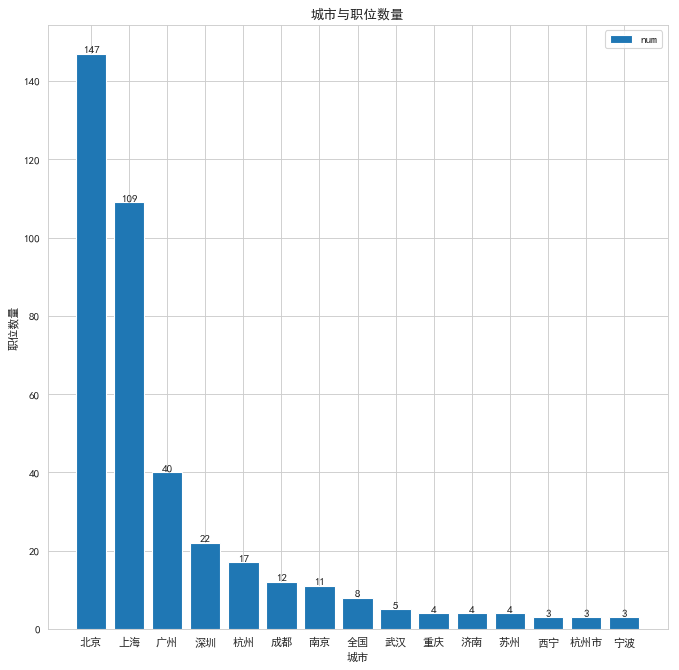

In [136]:
plt.figure(figsize=(10, 10), dpi=80)
x = city[:15].index
y = city[:15].values
p = plt.bar(x, y, label="num")
for x,y in zip(x,y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('城市')
plt.ylabel('职位数量')
plt.title('城市与职位数量')
plt.legend(loc="upper right")
plt.show()

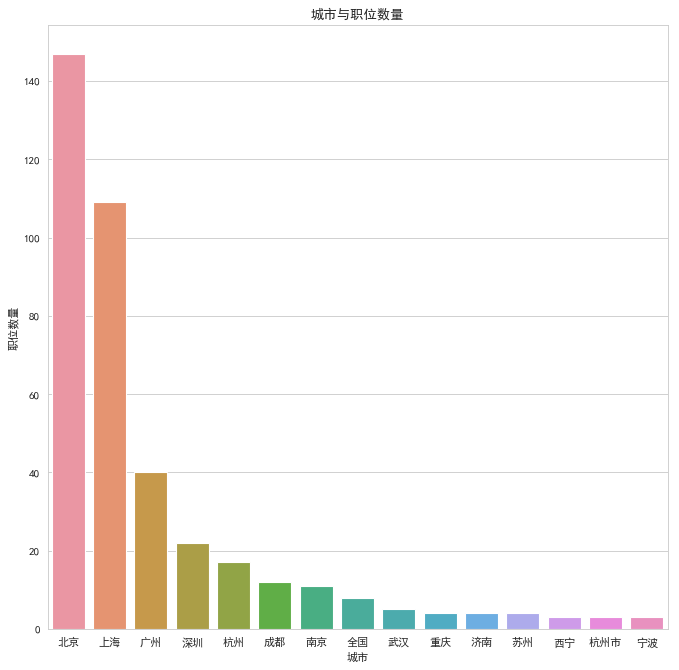

In [137]:
plt.figure(figsize=(10, 10), dpi=80)
x = city[:15].index
y = city[:15].values
sns.barplot(x=x, y=y, data=df,capsize=.05)
plt.xlabel('城市')
plt.ylabel('职位数量')
plt.title('城市与职位数量')
plt.show()

In [164]:
x = city[:15].index
y = city[:15].values
x1 = list(x)
# y1 = list(y)
y1=[147, 109, 40, 22, 17, 12, 11, 8, 5, 4, 4, 4, 3, 3, 3]
bar = Bar()
#指定柱状图的横坐标
bar.add_xaxis(x1)
#指定柱状图的纵坐标，而且可以指定多个纵坐标
bar.add_yaxis("职位数量", y1)
bar.set_global_opts(title_opts=opts.TitleOpts(title="城市与职位数量"))
bar.render_notebook()

/Users/guo/anaconda3/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [90]:
city_pct = (city/city.sum()).map(lambda x: '{:,.2%}'.format(x))
city_pct

北京     35.85%
上海     26.59%
广州      9.76%
深圳      5.37%
杭州      4.15%
成都      2.93%
南京      2.68%
全国      1.95%
武汉      1.22%
重庆      0.98%
济南      0.98%
苏州      0.98%
西宁      0.73%
杭州市     0.73%
宁波      0.73%
郑州      0.49%
沈阳      0.49%
西安      0.49%
天津      0.49%
兰州      0.24%
昆明      0.24%
珠海      0.24%
汕头      0.24%
长沙      0.24%
福州      0.24%
佛山      0.24%
江门      0.24%
大连      0.24%
东莞      0.24%
Name: 城市, dtype: object

##  薪资分析

In [91]:
df1 = pd.read_csv('薪资分析.txt', delimiter=';')
df1.head()

,工作,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪,平均日薪
0,数据分析师,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150,125.0
1,数据分析师岗（实习生）,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150,135.0
2,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500,400.0
3,电商数据分析实习生,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200,175.0
4,数据仓库与数据分析实习生,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400,300.0


### 全国的平均月薪

In [92]:
df1['月薪'] = df1['每周工作时长'] * df1['平均日薪'] * 4
df1['月薪'].mean()

3118.208955223881

### 月薪与城市

In [93]:
salary_by_city = df1.groupby('城市')['月薪'].mean()
salary_by_city

城市
上海     2739.439252
东莞     4000.000000
佛山     3500.000000
全国     4632.500000
兰州     2500.000000
北京     3392.000000
南京     3050.000000
大连     1440.000000
天津     2250.000000
宁波     4833.333333
广州     2828.500000
成都     3209.090909
昆明     2500.000000
杭州     3196.470588
杭州市    1120.000000
武汉     2320.000000
汕头     1200.000000
江门     3000.000000
沈阳     1550.000000
济南     2425.000000
深圳     3938.095238
珠海     2500.000000
福州     2000.000000
苏州     5000.000000
西宁     2500.000000
西安     2250.000000
郑州     2670.000000
重庆     2195.000000
Name: 月薪, dtype: float64

In [94]:
salary_by_city_sort = salary_by_city[city_pct.index].sort_values(ascending=False)
salary_by_city_sort

苏州     5000.000000
宁波     4833.333333
全国     4632.500000
东莞     4000.000000
深圳     3938.095238
佛山     3500.000000
北京     3392.000000
成都     3209.090909
杭州     3196.470588
南京     3050.000000
江门     3000.000000
广州     2828.500000
上海     2739.439252
郑州     2670.000000
昆明     2500.000000
珠海     2500.000000
西宁     2500.000000
兰州     2500.000000
济南     2425.000000
武汉     2320.000000
西安     2250.000000
天津     2250.000000
重庆     2195.000000
福州     2000.000000
沈阳     1550.000000
大连     1440.000000
汕头     1200.000000
杭州市    1120.000000
长沙             NaN
Name: 月薪, dtype: float64

posx and posy should be finite values
posx and posy should be finite values


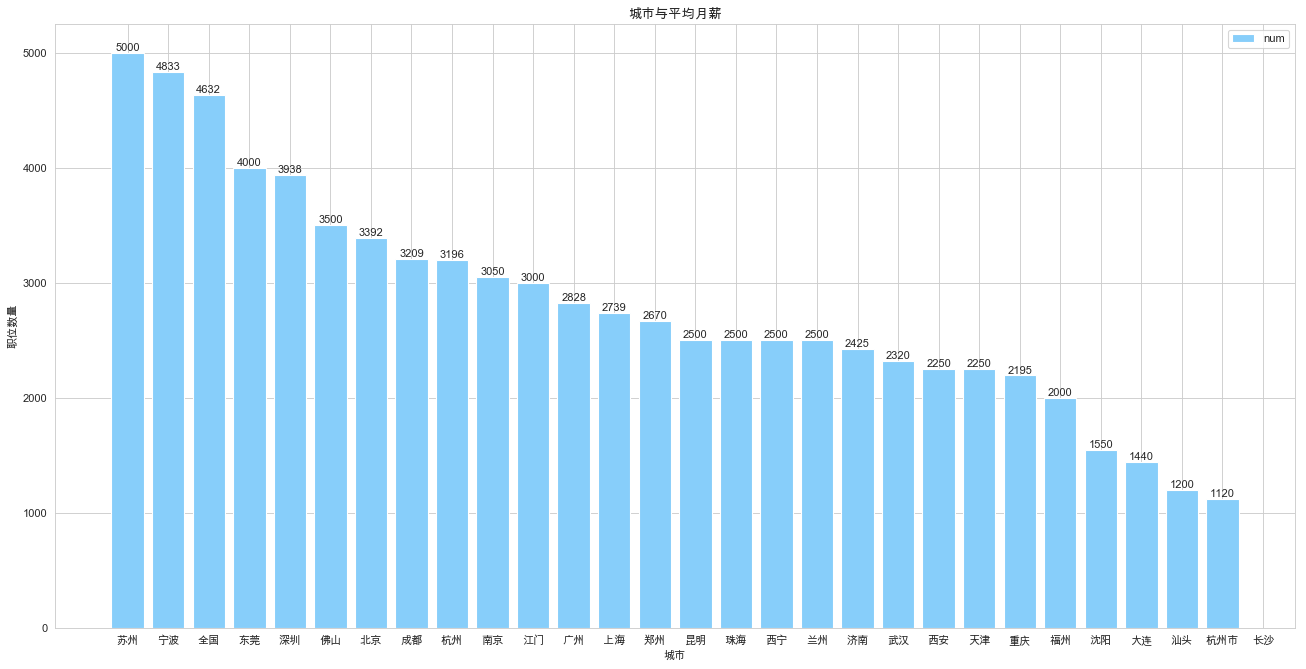

In [95]:
plt.figure(figsize=(20, 10), dpi=80)
x = salary_by_city_sort.index
y = salary_by_city_sort.values
p = plt.bar(x, y, label="num", color="#87CEFA")
for x,y in zip(x,y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('城市')
plt.ylabel('职位数量')
plt.title('城市与平均月薪')
plt.legend(loc="upper right")
plt.show()

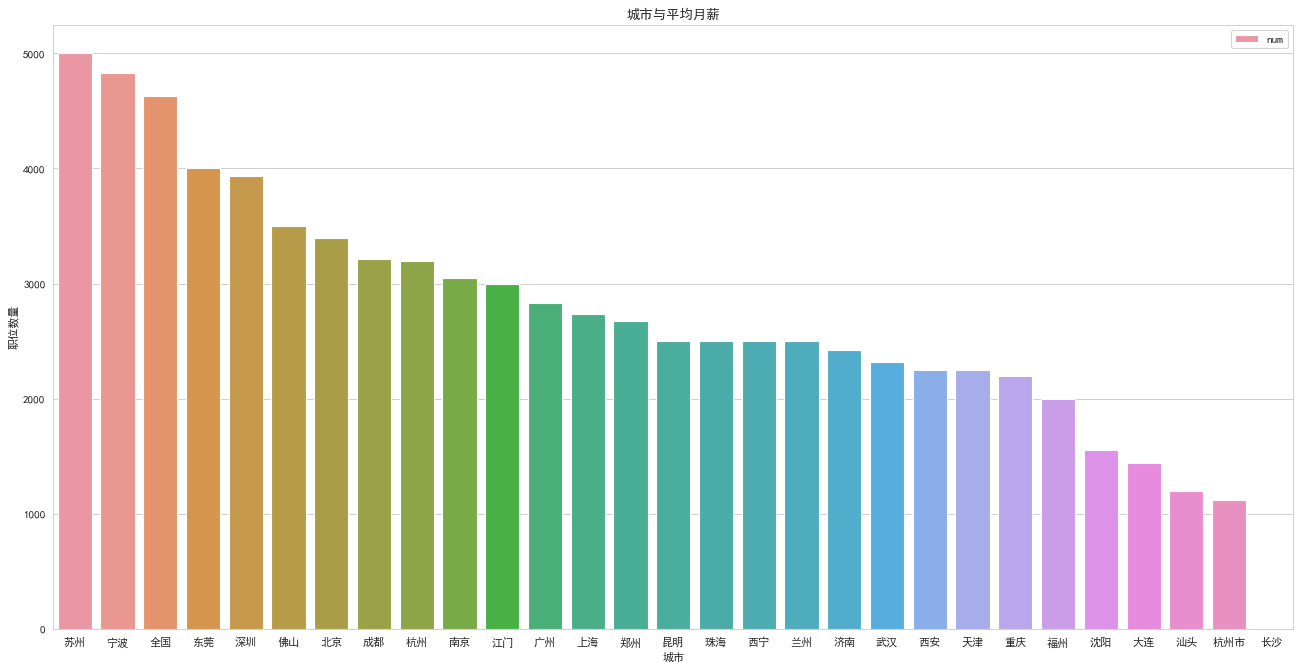

In [108]:
plt.figure(figsize=(20, 10), dpi=80)
x = salary_by_city_sort.index
y = salary_by_city_sort.values
sns.barplot(x=x, y=y, data=df,capsize=.05,label="num")
plt.xlabel('城市')
plt.ylabel('职位数量')
plt.title('城市与平均月薪')
plt.legend(loc="upper right")
plt.show()

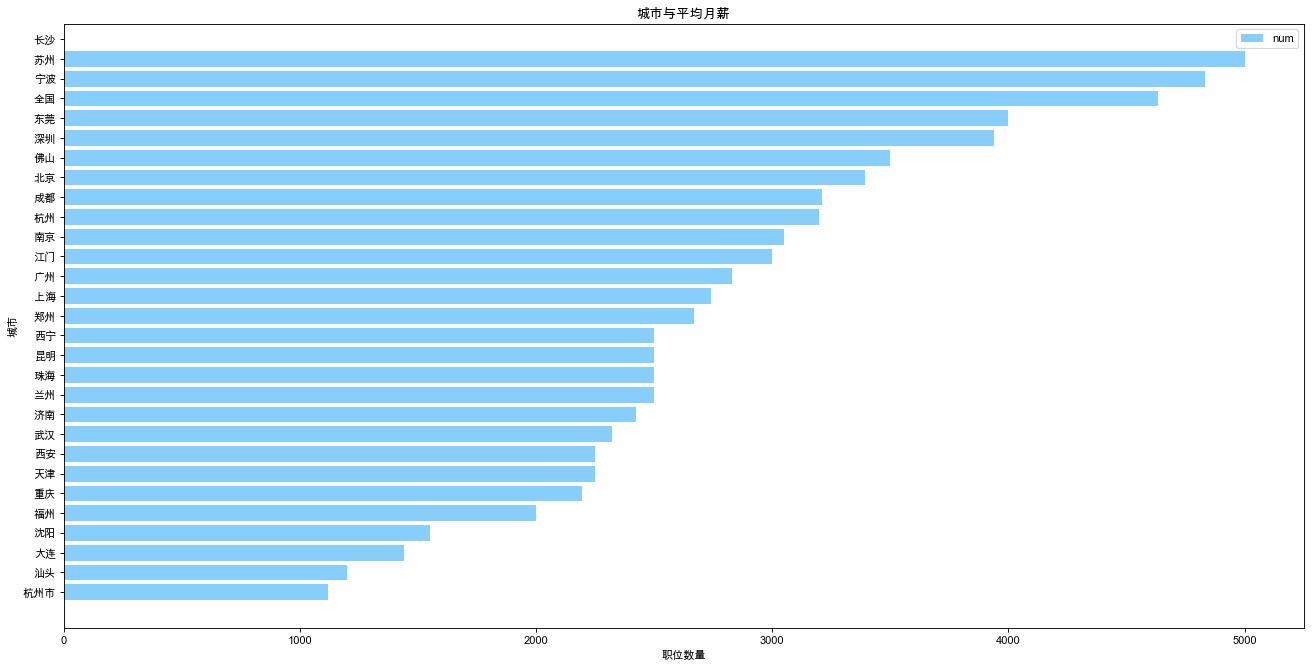

In [117]:
salary_by_city_sort1 = salary_by_city[city_pct.index].sort_values(ascending=True)
plt.figure(figsize=(20, 10), dpi=80)
x = salary_by_city_sort1.index
y = salary_by_city_sort1.values
p = plt.barh(x, y, label="num", color="#87CEFA")
plt.ylabel('城市')
plt.xlabel('职位数量')
plt.title('城市与平均月薪')
plt.legend(loc="upper right")
plt.show()

## 评论词云

In [139]:
with open('薪资评论.txt', 'w') as f:  # 'a'表示append,即在原来文件内容后继续写数据（不清楚原有数据）
    for i in range(len(df1)):
        f.write(df1['优点'][i])

In [145]:
# 分词
def trans_CN(text):
    # 接收分词的字符串
    word_list = jieba.cut(text)
    # 分词后在单独个体之间加上空格
    result = " ".join(word_list)
    return result


with open("薪资分析.txt") as fp:
    text = fp.read()
    # print(text)
    # 将读取的中文文档进行分词
    text = trans_CN(text)
    # print(text)
    mask = np.array(image.open("love.png"))
    wordcloud = WordCloud(
        # 添加遮罩层
        mask=mask,
        background_color="white",
        # 生成中文字的字体,必须要加,不然看不到中文
        font_path="/System/Library/Fonts/Supplemental/Arial Unicode.ttf",
        collocations=False  # 防止出现重复数据
    ).generate(text)
    image_produce = wordcloud.to_image()
    image_produce.show()
    wordcloud.to_file("词云图片.jpg")

## 公司规模

In [2]:
df = pd.read_csv('其他分析.txt', delimiter=';')
df

,工作,城市,每周工作时长,实习期,公司名,公司规模,优点,最低日薪,最高日薪
0,数据分析师,兰州,5.0,12.0,亚信科技,2000,提供转正机会一对一面授成长空间丰富 优秀的团队，技术，留用转正机会,100,150.0
1,数据分析师岗（实习生）,北京,5.0,3.0,京东,2000,暑期实习 精英多多，团队实力强，锻炼自我，专业、活力、创造，AI，技术大牛坐镇，精英，nic...,120,150.0
2,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理逻辑思维数据分析决策能力热爱教育广告投放管理团队战略决策 广阔的职业发展平台，晋升空...,300,500.0
3,电商数据分析实习生,北京,5.0,3.0,字节跳动,2000,下午茶三餐免费健身房 亿级日活平台，今日头条，抖音，年轻、扁平、透明，免费三餐健身房，租房补贴,150,200.0
4,数据仓库与数据分析实习生,北京,5.0,6.0,字节跳动,2000,实习证明远程实习下午茶免费健身房生日福利地铁周边免费三餐定期团建弹性工作免费咖啡 亿级日活平...,200,400.0
5,市场调研（数据分析）实习生,杭州,5.0,3.0,滴滴,2000,大厂实习弹性工作福利晚餐 互联网，高逼格大厦，名企实习，各种福利，广阔平台,150,200.0
6,数据分析专员,成都,5.0,4.0,成都链家,2000,年轻团队晋升快平台大 公司前景好，人性化，奖金丰厚，子女医疗，实践机会,100,150.0
7,项目管培生,广州,6.0,12.0,尚德机构,2000,项目管理团队管理广告投放数据分析逻辑能力决策能力战略决策热爱教育 广阔的职业发展平台，晋升空...,300,500.0
8,管培生,广州,6.0,12.0,尚德机构,2000,逻辑思维热爱教育数据分析决策能力管理团队广告投放项目管理战略决策 广阔的职业发展平台，晋升空...,300,500.0
9,数据分析专员,成都,5.0,5.0,链家,2000,带薪年假绩效奖金五险一金员工旅游节日福利 给力的福利，出国带薪旅游，五险一金，活力强，高薪资高挑战,150,200.0


In [11]:
df.loc[:,'公司规模'].value_counts()

2000    156
1250     71
325      70
100      53
32       49
15       10
750       1
Name: 公司规模, dtype: int64

In [ ]:
大型企业：156    中型企业：244     小型企业：10

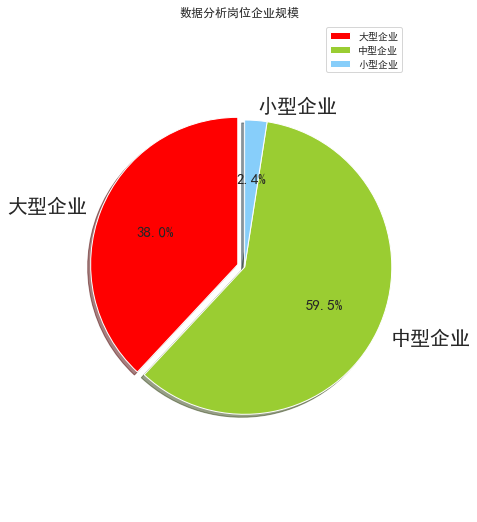

In [113]:
plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = [u'大型企业',u'中型企业',u'小型企业']
#每个标签占多大，会自动去算百分比
sizes = [156,244,10]
colors = ['red','yellowgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0.05,0,0)
 
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)
# 参数：
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
 
#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(15)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('数据分析岗位企业规模')
plt.legend()
plt.show()

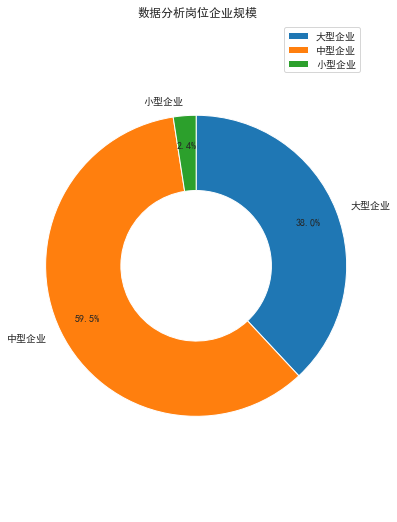

In [121]:
plt.figure(figsize=(6,9))
labels = [u'大型企业',u'中型企业',u'小型企业']
#每个标签占多大，会自动去算百分比
sizes = [156,244,10]
plt.pie(sizes, labels=labels, startangle = 90,autopct = '%3.1f%%',pctdistance = 0.8,
        counterclock = False, wedgeprops = {'width' : 0.5});

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.title('数据分析岗位企业规模')
plt.legend()
plt.show()